In [141]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import numpy as np
import tqdm
import warnings
import seaborn as sns

## Functions

In [13]:
def split_train_test(df):
    
    df_train=df[df['Partition']=='Train']
    df_val=df[df['Partition']=='Val']
    df_test=df[df['Partition']=='Test']

    df_train_X=df_train.iloc[:,1:-6]
    df_train_Y=df_train.iloc[:,-6:-1]

    df_val_X=df_val.iloc[:,1:-6]
    df_val_Y=df_val.iloc[:,-6:-1]

    df_test_X=df_test.iloc[:,1:-6]
    df_test_Y=df_test.iloc[:,-6:-1]

    return df_test_X, df_test_Y, df_train_X, df_train_Y, df_val_X, df_val_Y

def RandomForest(df):  
    
    X_test, Y_test, X_train, Y_train, X_val, Y_val =split_train_test(df)
    
    RF_reg=RandomForestRegressor(random_state=42) 
    
    RF_reg.fit(X_train,Y_train)
      
    predictions=RF_reg.predict(X_val.values)
      
    r2=r2_score(Y_val, predictions)    
    
    MAE=mean_absolute_error(Y_val, predictions)
    MSE=mean_squared_error(Y_val, predictions)
    RMSE=np.sqrt(mean_squared_error(Y_val, predictions))
        
    return predictions,r2,MAE,MSE,RMSE,Y_val, RF_reg

def resumen(var):
    
    big_five=['all','O','C','E','A','N']

    DF_final=pd.DataFrame()
    DF_final['index']=['r2','r','MAE','MSE','RMSE']
    DF_final=DF_final.set_index('index')    

    for dim in big_five:
        DF_final[dim]=np.array([var['r2_'+dim],np.sqrt(var['r2_'+dim]),var['MAE_'+dim],var['MSE_'+dim],var['RMSE_'+dim]])

    return DF_final   

## Boostrapping Results

In [6]:
df=pd.read_csv('../experiments/egemaps/random_forest/default/all_audio/local_data/egemaps_all_audio_complete_set.csv',index_col=0)

In [123]:
n_samples=100
iterations=1000
metrics_list=[]

warnings.filterwarnings("ignore")

for i in tqdm.tqdm(range(iterations)):
    subset=df.sample(n=n_samples, replace=True)
    preds_all,r2_all,MAE_all,MSE_all,RMSE_all,y_test,RF_reg=RandomForest(subset)
    metrics=[r2_all,np.sqrt(r2_all),MAE_all,MSE_all,RMSE_all]
    metrics_list.append(metrics)
    
metrics_list=np.transpose(metrics_list)
df=pd.DataFrame({'r2':metrics_list[0],'r':metrics_list[1],'MAE':metrics_list[2],'MSE':metrics_list[3],'RMSE':metrics_list[4]})

100%|██████████| 1000/1000 [06:45<00:00,  2.47it/s]


In [140]:
df[['r2','MAE','MSE','RMSE']].describe()

,r2,MAE,MSE,RMSE
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.026944,0.111563,0.019639,0.139103
std,0.203855,0.014053,0.004831,0.017029
min,-1.359975,0.066284,0.007059,0.084015
25%,-0.128818,0.101450,0.016116,0.126947
50%,0.004908,0.111020,0.019131,0.138316
75%,0.104897,0.120791,0.022478,0.149927
max,0.499747,0.167286,0.038725,0.196786


R2

<AxesSubplot:xlabel='r2', ylabel='Density'>

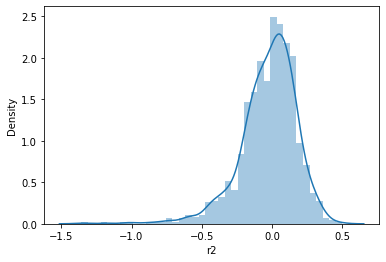

In [143]:
sns.distplot(df['r2'])

<AxesSubplot:xlabel='MAE', ylabel='Density'>

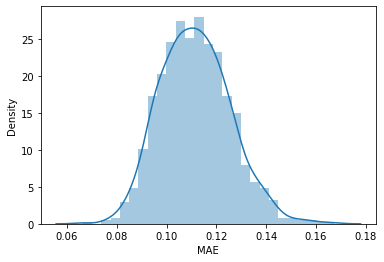

In [144]:
sns.distplot(df['MAE'])

<AxesSubplot:xlabel='MSE', ylabel='Density'>

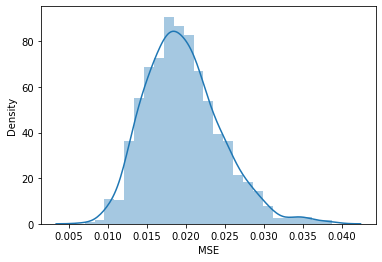

In [145]:
sns.distplot(df['MSE'])

<AxesSubplot:xlabel='RMSE', ylabel='Density'>

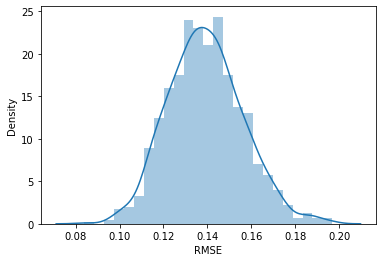

In [146]:
sns.distplot(df['RMSE'])